## CSE676: Deep Learning
### Project: Sentiment analysis on IMDb Movie Reviews dataset
### Sanchit Krishna Anandraj , Abhinandan Vijan , Satvik Singh

## Importing relevant libaries to perform cleaning and EDA steps

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud
from collections import Counter

## Reading data from a csv file and store it in a pandas data frame.

Read from drive using Google Colab

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# path = '/content/drive/MyDrive/IMDB Dataset.csv'

Read from local

In [9]:
path = 'IMDB Dataset.csv'

In [10]:
import pandas as pd
df = pd.read_csv(path)

## Data Statistics

In [12]:
df.shape

(50000, 2)

In [13]:
df.dtypes

review       object
sentiment    object
dtype: object

In [14]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [15]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


## Handling mising data

In [17]:
missing_data = df.isnull().sum()
print(missing_data)

review       0
sentiment    0
dtype: int64


In [18]:

print(df['review'].duplicated().sum())

418


In [19]:
# Remove duplicates
df.drop_duplicates(inplace=True)


In [20]:
df.shape

(49582, 2)

## Encoding the target column

In [22]:
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative': 0})

In [23]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


## Visualizing sentiment distribution

In [25]:
pos_count = df['sentiment'].eq(1).sum()
neg_count = df['sentiment'].eq(0).sum()

print("positive sentiment count",  pos_count )
print("negative sentiment count",  neg_count )


positive sentiment count 24884
negative sentiment count 24698


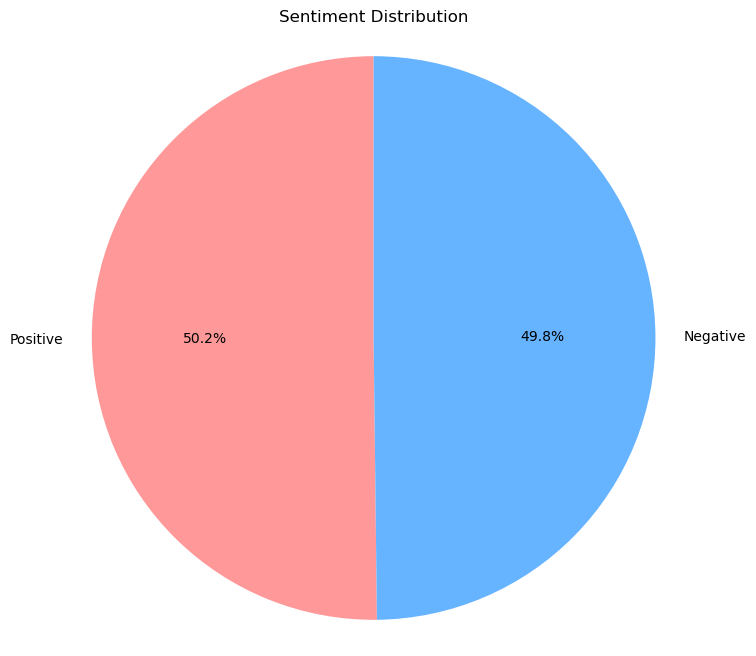

In [26]:
# Calculate the value counts for each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=['Positive', 'Negative'], autopct='%1.1f%%', startangle=90, colors= ['#ff9999','#66b3ff'])
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()


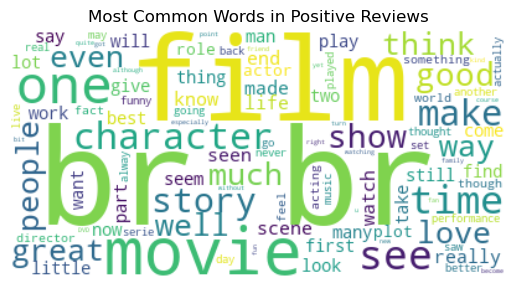

In [27]:
positive_reviews = df[df['sentiment'] == 1]
positive_text = ' '.join(positive_reviews['review'])
wordcloud = WordCloud(max_words=100, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Positive Reviews')
plt.show()

In [28]:

positive_text = ' '.join(positive_reviews['review'])
word_counts = Counter(positive_text.split())

common_words = word_counts.most_common(100)

common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
common_words_df



,Word,Frequency
0,the,290932
1,and,165372
2,a,155251
3,of,148673
4,to,127921
...,...,...
95,think,6493
96,do,6377
97,two,6130
98,make,6101


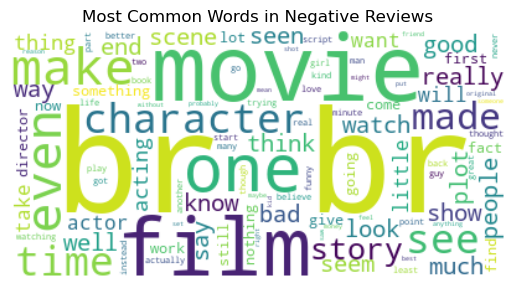

In [29]:
negative_reviews = df[df['sentiment'] == 0]
negative_text = ' '.join(negative_reviews['review'])
wordcloud = WordCloud(max_words=100, background_color='white').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Negative Reviews')
plt.show()

In [30]:
negative_reviews = df[df['sentiment'] == 0]
negative_text = ' '.join(negative_reviews['review'])
word_counts = Counter(negative_text.split())

common_words = word_counts.most_common(100)

# Convert to DataFrame for better visualization (optional)
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
common_words_df



,Word,Frequency
0,the,273542
1,a,149568
2,and,134388
3,of,132924
4,to,131974
...,...,...
95,think,6486
96,too,6327
97,being,6196
98,its,6157


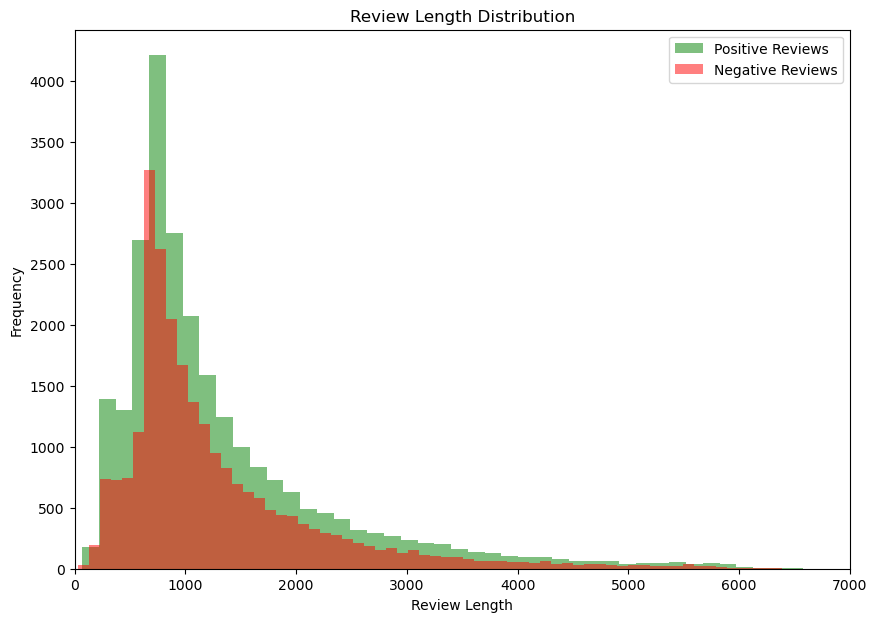

In [31]:
df['review_length'] = df['review'].apply(len)

positive_reviews = df[df['sentiment'] == 1]
negative_reviews = df[df['sentiment'] == 0]

# Plot histograms for positive and negative reviews in a single plot
plt.figure(figsize=(10, 7))
plt.hist(positive_reviews['review_length'], bins=90, color='green', alpha=0.5, label='Positive Reviews')
plt.hist(negative_reviews['review_length'], bins=90, color='red', alpha=0.5, label='Negative Reviews')

plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.xlim(0, 7000)
plt.legend()
plt.show()

## Splitting the dataset

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(df['review'], df['sentiment'], test_size = 0.2)

In [34]:
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('random_forest', (RandomForestClassifier(n_estimators=10, criterion='entropy')))
])

clf.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('random_forest',
                 RandomForestClassifier(criterion='entropy', n_estimators=10))])

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.77      4923
           1       0.79      0.71      0.75      4994

    accuracy                           0.76      9917
   macro avg       0.77      0.76      0.76      9917
weighted avg       0.77      0.76      0.76      9917



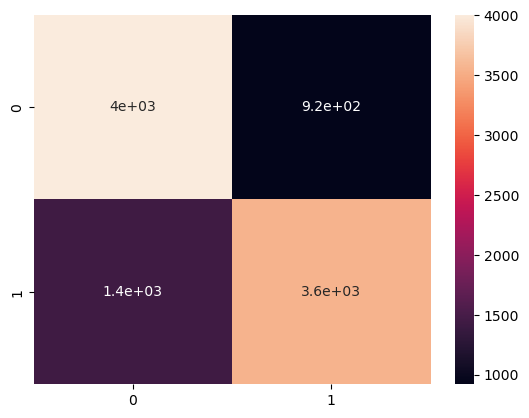

In [35]:
import seaborn as sns
Y_pred = clf.predict(X_test)
print('Classification Report:\n',classification_report(Y_test, Y_pred))
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True)
plt.show()

In [36]:
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('NB', MultinomialNB())
])

clf.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('NB', MultinomialNB())])

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      4923
           1       0.87      0.81      0.84      4994

    accuracy                           0.84      9917
   macro avg       0.84      0.84      0.84      9917
weighted avg       0.84      0.84      0.84      9917



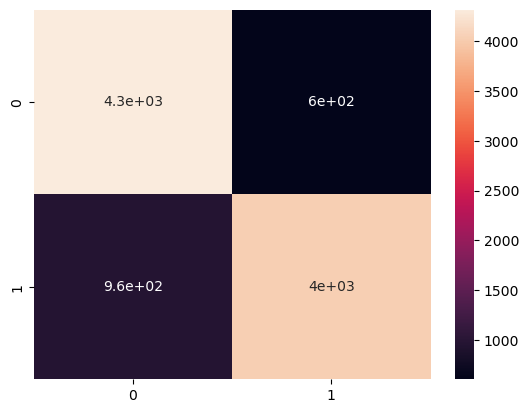

In [37]:
Y_pred = clf.predict(X_test)
print('Classification Report:\n',classification_report(Y_test, Y_pred))
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True)
plt.show()

# LSTM - Long Short Term Memory Model

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='keras.src.engine.training')

In [40]:
# Step 1: Data Preprocessing
def preprocess_data(df, num_words=5000, maxlen=200, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size, random_state=42)

    tokenizer = Tokenizer(num_words=num_words)
    tokenizer.fit_on_texts(train_data["review"])

    X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=maxlen)
    X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=maxlen)

    Y_train = train_data["sentiment"].values
    Y_test = test_data["sentiment"].values

    return X_train, X_test, Y_train, Y_test, tokenizer

In [41]:
# Step 2: Model Building
def build_model(input_dim, output_dim=128, maxlen=200):
    model = Sequential()
    model.add(Input(shape=(maxlen,)))
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [42]:
# Step 3: Model Training
def train_model(X_train, Y_train, input_dim, epochs=10, batch_size=64):
    model = build_model(input_dim=input_dim)
    history = model.fit(X_train, Y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_split=0.2,
                        verbose=1)
    return model, history

In [43]:
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

In [44]:
def evaluate_model(model, X_test, Y_test):
    Y_pred = (model.predict(X_test) > 0.5).astype("int32")

    print('Classification Report:\n', classification_report(Y_test, Y_pred))

    # Plotting confusion matrix
    cm = confusion_matrix(Y_test, Y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [45]:
def plot_roc_curve(model, X_test, Y_test):
    # Predict probabilities
    Y_pred_prob = model.predict(X_test)

    # Compute ROC curve and ROC area for positive class
    fpr_pos, tpr_pos, _ = roc_curve(Y_test, Y_pred_prob)
    roc_auc_pos = auc(fpr_pos, tpr_pos)

    # Compute ROC curve and ROC area for negative class
    fpr_neg, tpr_neg, _ = roc_curve(1 - Y_test, 1 - Y_pred_prob)
    roc_auc_neg = auc(fpr_neg, tpr_neg)

    # Plot ROC curves
    plt.figure(figsize=(12, 6))

    # Positive class
    plt.subplot(1, 2, 1)
    plt.plot(fpr_pos, tpr_pos, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_pos)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Positive Class')
    plt.legend(loc="lower right")

    # Negative class
    plt.subplot(1, 2, 2)
    plt.plot(fpr_neg, tpr_neg, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_neg)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Negative Class')
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

In [46]:
if __name__ == "__main__":

    X_train, X_test, Y_train, Y_test, tokenizer = preprocess_data(df)

    model, history = train_model(X_train, Y_train, input_dim=5000)

Epoch 1/10
496/496 [==============================] - 314s 633ms/step - loss: 0.4067 - accuracy: 0.8135 - val_loss: 0.3896 - val_accuracy: 0.8284
Epoch 2/10
496/496 [==============================] - 187s 378ms/step - loss: 0.2662 - accuracy: 0.8944 - val_loss: 0.2939 - val_accuracy: 0.8781
Epoch 3/10
496/496 [==============================] - 196s 395ms/step - loss: 0.2274 - accuracy: 0.9110 - val_loss: 0.3233 - val_accuracy: 0.8621
Epoch 4/10
496/496 [==============================] - 189s 382ms/step - loss: 0.1863 - accuracy: 0.9276 - val_loss: 0.3298 - val_accuracy: 0.8801
Epoch 5/10
496/496 [==============================] - 201s 404ms/step - loss: 0.1612 - accuracy: 0.9372 - val_loss: 0.3408 - val_accuracy: 0.8805
Epoch 6/10
496/496 [==============================] - 205s 413ms/step - loss: 0.1525 - accuracy: 0.9417 - val_loss: 0.3469 - val_accuracy: 0.8739
Epoch 7/10
496/496 [==============================] - 206s 416ms/step - loss: 0.1351 - accuracy: 0.9496 - val_loss: 0.3645 -

In [47]:
model.save('sanandra_avijan_satviksi_project_LSTM.h5')

310/310 [==============================] - 12s 39ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      4939
           1       0.87      0.88      0.87      4978

    accuracy                           0.87      9917
   macro avg       0.87      0.87      0.87      9917
weighted avg       0.87      0.87      0.87      9917



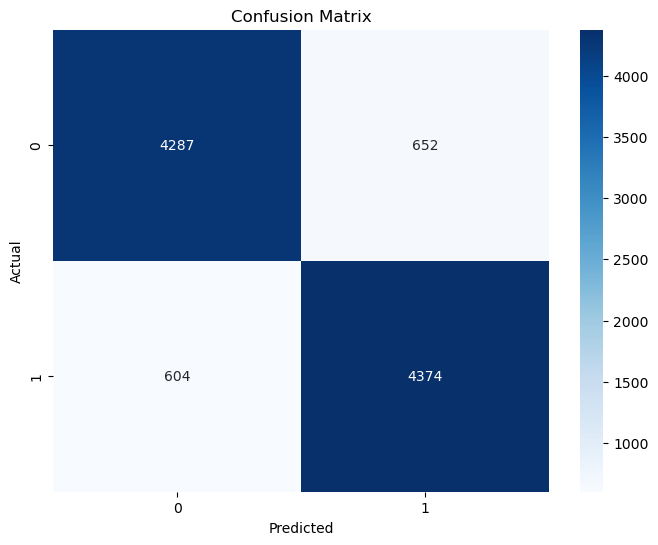

In [48]:
evaluate_model(model, X_test, Y_test)

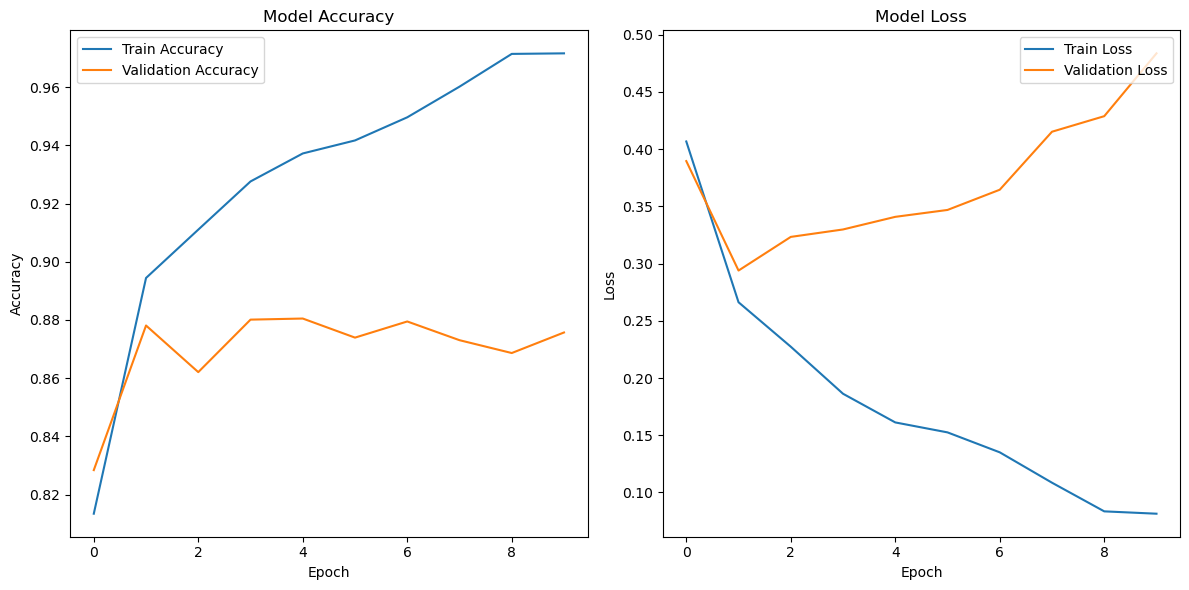

In [49]:
plot_training_history(history)

310/310 [==============================] - 12s 40ms/step


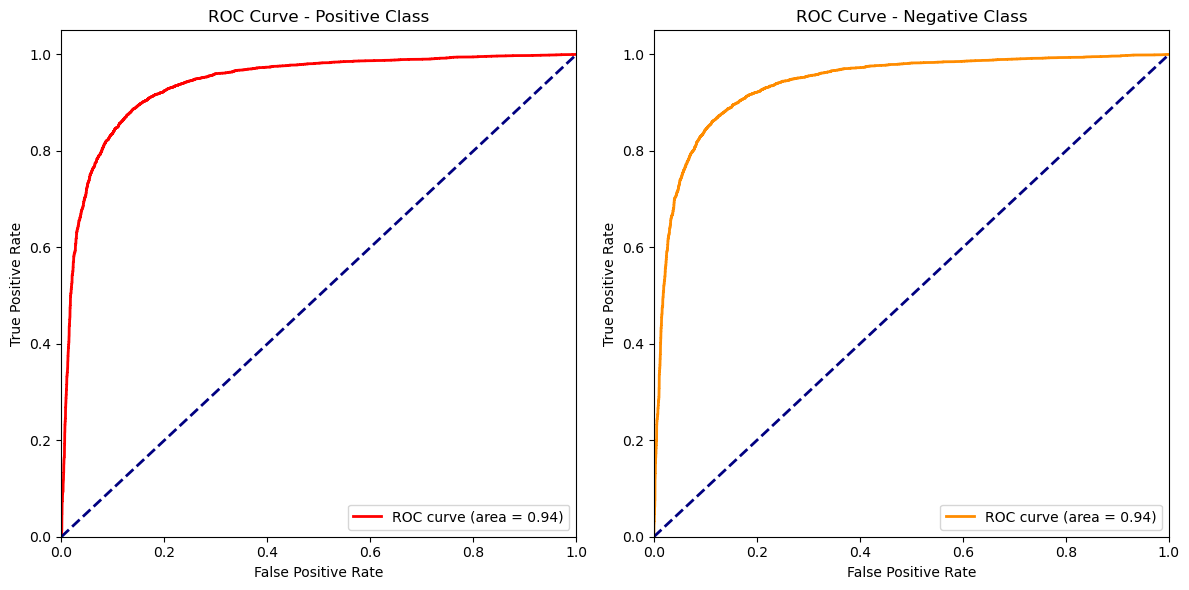

In [50]:
plot_roc_curve(model, X_test, Y_test)

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          640000    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 771713 (2.94 MB)
Trainable params: 771713 (2.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
loss_lstm, accuracy_lstm = model.evaluate(X_test, Y_test)
print("Loss: ",loss_lstm)
print("Accuracy: ",accuracy_lstm)

310/310 [==============================] - 12s 40ms/step - loss: 0.4737 - accuracy: 0.8733
Loss:  0.4736660420894623
Accuracy:  0.8733487725257874


In [53]:
def predictive_system(review):
  sequences = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequences, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

# Real Case Movie Review

Honestly, giving this a second viewing, I really hope we get a completed sequel trilogy.
I mean the movie predicted it’s own backlash within the movie.
It does what the first movie did, and mirrors society and the system we live in.
It literally states “people have given up, and just choose to live in the system.”
The fact that people attack this movie (and many others) for being “too woke” blows my mind.
It’s literally people being vocal about not wanting to wake up.
The movie def has its flaws, but what movie doesn’t? Idk, I love all of the Matrix movies.
Give me two more and I’ll be happy.

In [55]:
predictive_system("Honestly, giving this a second viewing, I really hope we get a completed sequel trilogy. I mean the movie predicted it’s own backlash within the movie. It does what the first movie did, and mirrors society and the system we live in. It literally states “people have given up, and just choose to live in the system.” The fact that people attack this movie (and many others) for being “too woke” blows my mind. It’s literally people being vocal about not wanting to wake up. The movie def has its flaws, but what movie doesn’t? Idk, I love all of the Matrix movies. Give me two more and I’ll be happy.")

1/1 [==============================] - 0s 16ms/step


'positive'

# Real Case Movie Review

This movie is absolutely terrible. The directing, acting, script and production are all bad.
There is actually NOTHING redeemable about it. In fact if MY friend was in this movie, instead of giving it a perfect score, I'd stop being friends with them.
That's how bad it is. YOU HAVE BEEN WARNED DO NOT WASTE YOUR TIME ON THIS MOVIE.

In [57]:
predictive_system("This movie is absolutely terrible. The directing, acting, script and production are all bad. There is actually NOTHING redeemable about it. In fact if MY friend was in this movie, instead of giving it a perfect score, I'd stop being friends with them. That's how bad it is. YOU HAVE BEEN WARNED DO NOT WASTE YOUR TIME ON THIS MOVIE.")

1/1 [==============================] - 0s 26ms/step


'negative'

# CNN Model

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='keras.src.engine.training')

In [60]:
# Data Preprocessing
def preprocess_data(df, num_words=5000, maxlen=200, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size, random_state=42)

    tokenizer = Tokenizer(num_words=num_words)
    tokenizer.fit_on_texts(train_data["review"])

    X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=maxlen)
    X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=maxlen)

    Y_train = train_data["sentiment"].values
    Y_test = test_data["sentiment"].values

    return X_train, X_test, Y_train, Y_test, tokenizer

In [61]:
# Model Building with CNN
def build_model(input_dim, maxlen=200):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=128, input_length=maxlen))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [62]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

def train_model(X_train, Y_train, input_dim, maxlen=200, epochs=10, batch_size=32):
    model = build_model(input_dim=input_dim, maxlen=maxlen)

    # Checkpoint callback to save the best model
    checkpoint = ModelCheckpoint('sanandra_avijan_satviksi_project_CNN.h5',monitor='val_loss', save_best_only=True, mode='min')
    early_stop = EarlyStopping(monitor='val_loss', patience=3, mode='min')

    # Training the model
    history = model.fit(
        X_train, Y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        callbacks=[checkpoint, early_stop],
        verbose=1
    )

    return model, history

In [63]:
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

In [64]:
def evaluate_model(model, X_test, Y_test):
    Y_pred = (model.predict(X_test) > 0.5).astype("int32")

    print('Classification Report:\n', classification_report(Y_test, Y_pred))

    # Plotting confusion matrix
    cm = confusion_matrix(Y_test, Y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [65]:
def plot_roc_curve(model, X_test, Y_test):
    # Predict probabilities
    Y_pred_prob = model.predict(X_test)

    # Compute ROC curve and ROC area for positive class
    fpr_pos, tpr_pos, _ = roc_curve(Y_test, Y_pred_prob)
    roc_auc_pos = auc(fpr_pos, tpr_pos)

    # Compute ROC curve and ROC area for negative class
    fpr_neg, tpr_neg, _ = roc_curve(1 - Y_test, 1 - Y_pred_prob)
    roc_auc_neg = auc(fpr_neg, tpr_neg)

    # Plot ROC curves
    plt.figure(figsize=(12, 6))

    # Positive class
    plt.subplot(1, 2, 1)
    plt.plot(fpr_pos, tpr_pos, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_pos)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Positive Class')
    plt.legend(loc="lower right")

    # Negative class
    plt.subplot(1, 2, 2)
    plt.plot(fpr_neg, tpr_neg, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_neg)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Negative Class')
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

In [66]:
X_train, X_test, Y_train, Y_test, tokenizer = preprocess_data(df)

In [67]:
input_dim = min(tokenizer.num_words, len(tokenizer.word_index) + 1)
model, history = train_model(X_train, Y_train, input_dim)

Epoch 1/10
992/992 [==============================] - 15s 15ms/step - loss: 0.3754 - accuracy: 0.8206 - val_loss: 0.2682 - val_accuracy: 0.8854
Epoch 2/10
992/992 [==============================] - 15s 15ms/step - loss: 0.1864 - accuracy: 0.9284 - val_loss: 0.2595 - val_accuracy: 0.8951
Epoch 3/10
992/992 [==============================] - 16s 16ms/step - loss: 0.0812 - accuracy: 0.9727 - val_loss: 0.3449 - val_accuracy: 0.8889
Epoch 4/10
992/992 [==============================] - 16s 16ms/step - loss: 0.0327 - accuracy: 0.9895 - val_loss: 0.4124 - val_accuracy: 0.8883
Epoch 5/10
992/992 [==============================] - 15s 15ms/step - loss: 0.0174 - accuracy: 0.9941 - val_loss: 0.5001 - val_accuracy: 0.8878


In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          640000    
                                                                 
 conv1d (Conv1D)             (None, 196, 128)          82048     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                      

310/310 [==============================] - 1s 4ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      4939
           1       0.88      0.90      0.89      4978

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



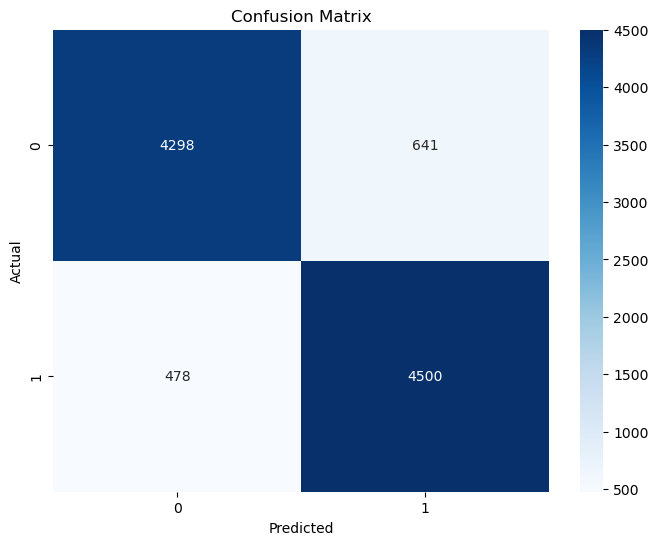

In [69]:
evaluate_model(model, X_test, Y_test)

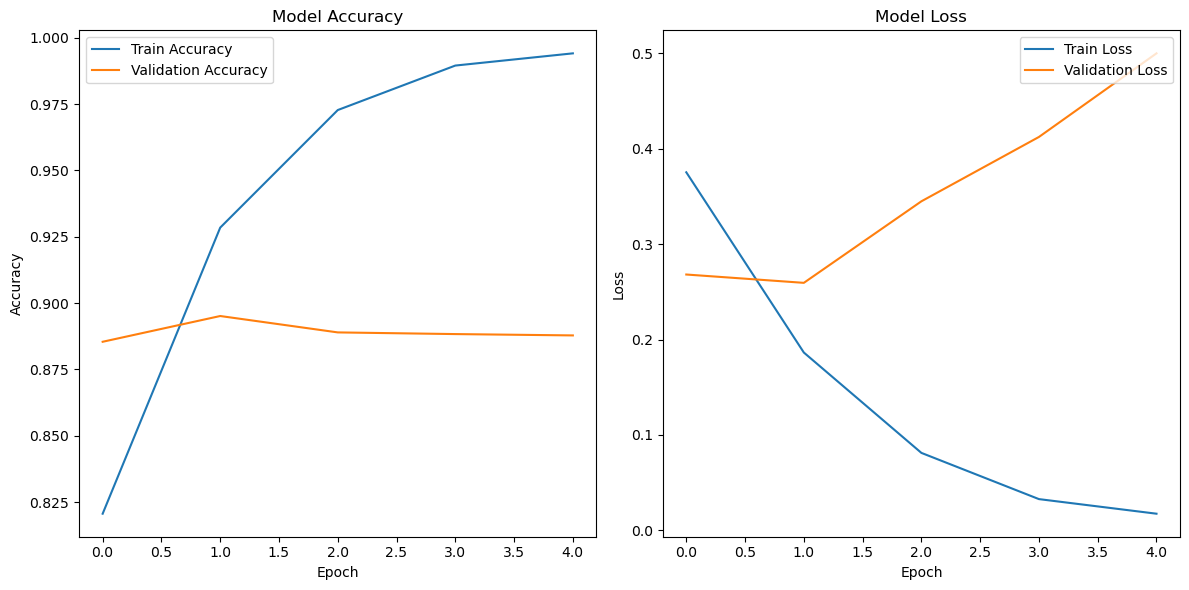

In [70]:
plot_training_history(history)

310/310 [==============================] - 1s 4ms/step


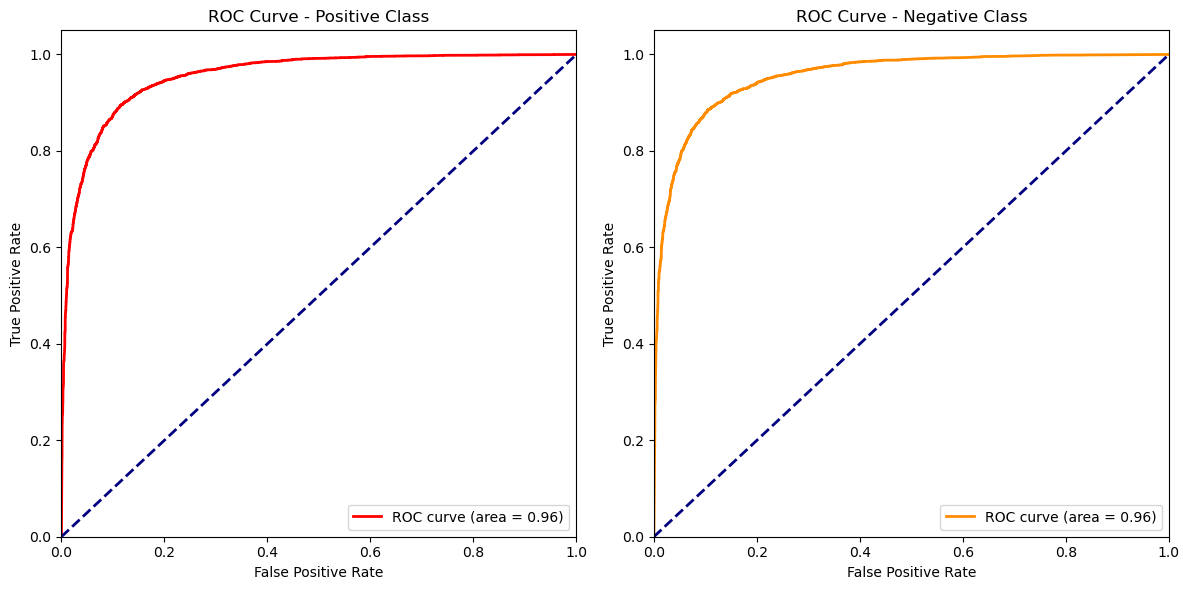

In [71]:
plot_roc_curve(model, X_test, Y_test)

In [72]:
loss_cnn, accuracy_cnn = model.evaluate(X_test, Y_test)
print("Loss: ",loss_cnn)
print("Accuracy: ",accuracy_cnn)

310/310 [==============================] - 1s 4ms/step - loss: 0.5135 - accuracy: 0.8872
Loss:  0.5134872794151306
Accuracy:  0.8871634602546692


In [73]:
def predictive_system(review):
  sequences = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequences, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

**Negative real case movie review** - Some funny bits but far too few to save this movie from a quick exit from the theaters.

In [75]:
predictive_system("Some funny bits but far too few to save this movie from a quick exit from the theaters.")

1/1 [==============================] - 0s 7ms/step


'negative'

**Positive real case movie review** - "Totally complete sci-fi comic book action movie with an excellent performance from Downey supported by a simple but solid script, superb effects and brilliant score"

In [77]:
predictive_system("Totally complete sci-fi comic book action movie with an excellent performance from Downey supported by a simple but solid script, superb effects and brilliant score")

1/1 [==============================] - 0s 7ms/step


'positive'

# RNN model without removing stop words

In [79]:
df.head()

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,1,1761
1,A wonderful little production. <br /><br />The...,1,998
2,I thought this was a wonderful way to spend ti...,1,926
3,Basically there's a family where a little boy ...,0,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317


In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout

def preprocess_data_for_rnn(df, max_seq_length=128, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size, random_state=42)

    tokenizer = tf.keras.preprocessing.text.Tokenizer()
    tokenizer.fit_on_texts(train_data['review'])

    X_train = tokenizer.texts_to_sequences(train_data['review'])
    X_test = tokenizer.texts_to_sequences(test_data['review'])

    X_train = pad_sequences(X_train, maxlen=max_seq_length, padding='post')
    X_test = pad_sequences(X_test, maxlen=max_seq_length, padding='post')

    y_train = train_data['sentiment']
    y_test = test_data['sentiment']

    return X_train, X_test, y_train, y_test, tokenizer.word_index

def build_rnn_model(max_seq_length, vocab_size):
    model = tf.keras.Sequential([
        Embedding(input_dim=vocab_size+1, output_dim=256, input_length=max_seq_length),
        Bidirectional(LSTM(256, return_sequences=True)),
        Dropout(0.5),
        LSTM(256),
        Dense(1, activation='sigmoid')
    ])
    return model

def train_rnn_model(X_train, X_test, y_train, y_test, max_seq_length, vocab_size, epochs=10):
    model = build_rnn_model(max_seq_length, vocab_size)

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint('sanandra_avijan_satviksi_project_RNN_with_stop_words.h5', monitor='val_accuracy', save_best_only=True, mode='max')
    early_stop = EarlyStopping(monitor='val_accuracy', patience=5, mode='max')

    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=64,
        validation_data=(X_test, y_test),
        callbacks=[checkpoint, early_stop],
        verbose=1
    )

    return model, history

X_train, X_test, y_train, y_test, word_index = preprocess_data_for_rnn(df)

In [81]:
max_seq_length = 128
vocab_size = len(word_index)

model, history = train_rnn_model(X_train, X_test, y_train, y_test, max_seq_length, vocab_size, epochs=20)



Epoch 1/20
620/620 [==============================] - 717s 1s/step - loss: 0.5596 - accuracy: 0.7087 - val_loss: 0.5612 - val_accuracy: 0.7395
Epoch 2/20
620/620 [==============================] - 393s 633ms/step - loss: 0.3559 - accuracy: 0.8436 - val_loss: 0.3266 - val_accuracy: 0.8620
Epoch 3/20
620/620 [==============================] - 905s 1s/step - loss: 0.1882 - accuracy: 0.9284 - val_loss: 0.3170 - val_accuracy: 0.8688
Epoch 4/20
620/620 [==============================] - 346s 559ms/step - loss: 0.0939 - accuracy: 0.9680 - val_loss: 0.3855 - val_accuracy: 0.8611
Epoch 5/20
620/620 [==============================] - 371s 599ms/step - loss: 0.0451 - accuracy: 0.9863 - val_loss: 0.4999 - val_accuracy: 0.8611
Epoch 6/20
620/620 [==============================] - 614s 991ms/step - loss: 0.0224 - accuracy: 0.9938 - val_loss: 0.5217 - val_accuracy: 0.8579
Epoch 7/20
620/620 [==============================] - 403s 650ms/step - loss: 0.0149 - accuracy: 0.9958 - val_loss: 0.6672 - val_a

In [82]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

310/310 [==============================] - 43s 139ms/step - loss: 0.7367 - accuracy: 0.8593
Loss: 0.7367, Accuracy: 0.8593


In [83]:
# Evaluate the model
loss_rnn_basic, accuracy_rnn_basic = model.evaluate(X_test, y_test)
print(f'Loss: {loss_rnn_basic:.4f}, Accuracy: {accuracy_rnn_basic:.4f}')

310/310 [==============================] - 40s 129ms/step - loss: 0.7367 - accuracy: 0.8593
Loss: 0.7367, Accuracy: 0.8593


In [84]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 128, 256)          28715008  
                                                                 
 bidirectional (Bidirection  (None, 128, 512)          1050624   
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 128, 512)          0         
                                                                 
 lstm_2 (LSTM)               (None, 256)               787456    
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 30553345 (116.55 MB)
Trainable params: 30553345 (116.55 MB)
Non-trainable params: 0 (0.00 Byte)
__________

310/310 [==============================] - 40s 127ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4939
           1       0.86      0.86      0.86      4978

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



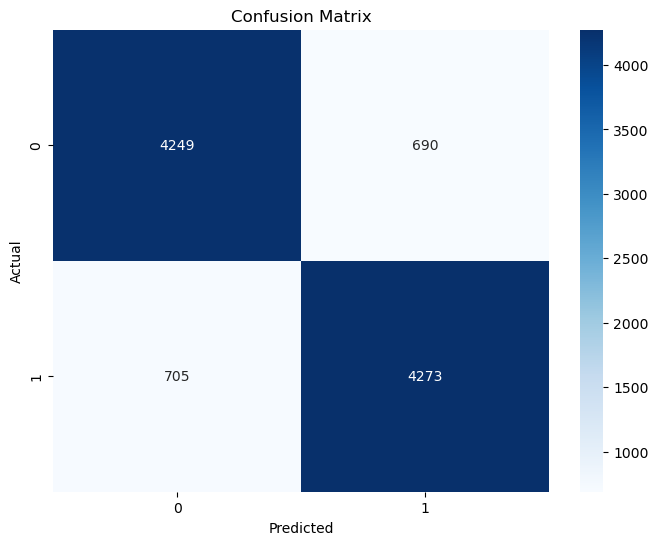

In [85]:
evaluate_model(model, X_test, y_test)

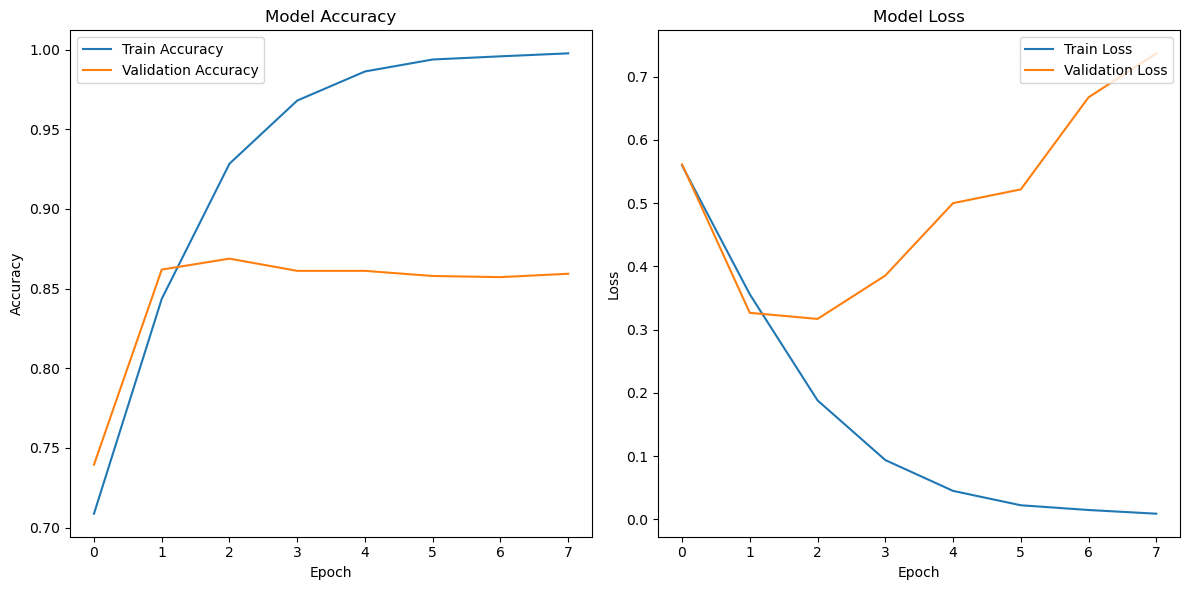

In [86]:
plot_training_history(history)

310/310 [==============================] - 38s 124ms/step


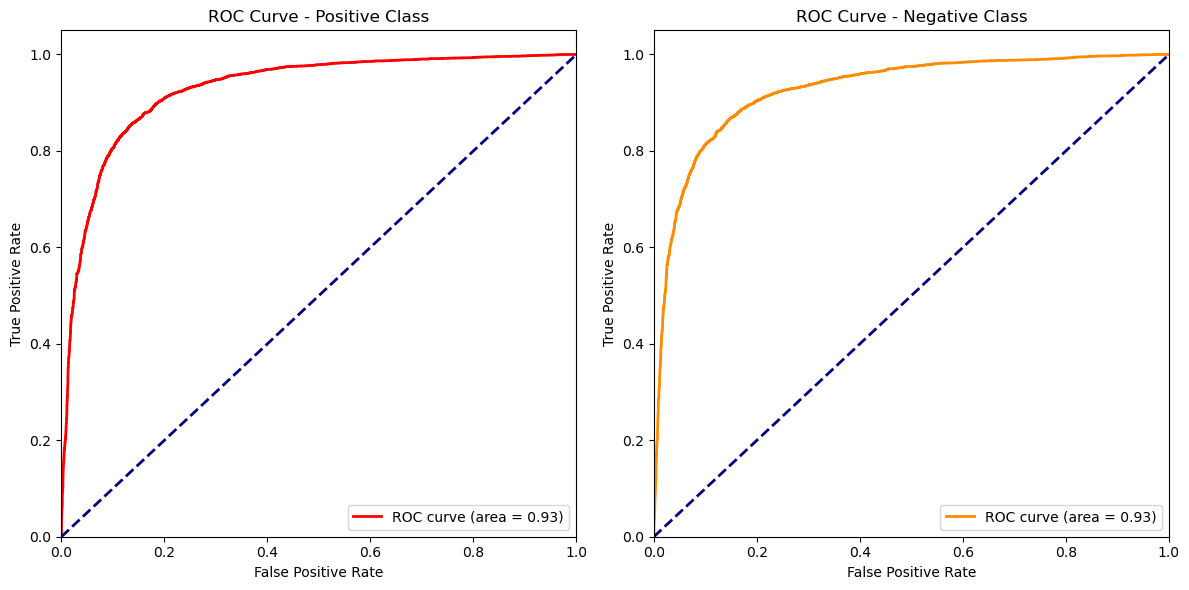

In [87]:
plot_roc_curve(model, X_test, y_test)

# Data Cleaning by removing stop words

In [89]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhinandanvijan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/abhinandanvijan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [90]:
mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not",
           "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will",
           "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have",
           "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
           "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not",
           "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is",
           "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
           "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is",
           "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is",
           "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
           "y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }
PUNCT_TO_REMOVE = string.punctuation # '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
eng_stopwords = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

def clean_contractions(text, mapping):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    return text

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in eng_stopwords])

def word_replace(text):
    return text.replace('<br />','')

def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

def preprocess(text):
    text = clean_contractions(text, mapping)
    text = text.lower()
    text = word_replace(text)
    text = remove_urls(text)
    text = remove_html(text)
    text = remove_stopwords(text)
    text = remove_punctuation(text)
    text = lemmatize_words(text)

    return text

In [91]:
df["reviews_preprocessed"]=df["review"].apply(lambda text: preprocess(text))
df.head()

,review,sentiment,review_length,reviews_preprocessed
0,One of the other reviewers has mentioned that ...,1,1761,one reviewer mentioned watching 1 oz episode h...
1,A wonderful little production. <br /><br />The...,1,998,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,926,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,748,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,petter matteis love time money visually stunni...


In [92]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout

def preprocess_data_for_rnn(df, max_seq_length=128, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size, random_state=42)

    tokenizer = tf.keras.preprocessing.text.Tokenizer()
    tokenizer.fit_on_texts(train_data['reviews_preprocessed'])

    X_train = tokenizer.texts_to_sequences(train_data['reviews_preprocessed'])
    X_test = tokenizer.texts_to_sequences(test_data['reviews_preprocessed'])

    X_train = pad_sequences(X_train, maxlen=max_seq_length, padding='post')
    X_test = pad_sequences(X_test, maxlen=max_seq_length, padding='post')

    y_train = train_data['sentiment']
    y_test = test_data['sentiment']

    return X_train, X_test, y_train, y_test, tokenizer.word_index

def build_rnn_model(max_seq_length, vocab_size):
    model = tf.keras.Sequential([
        Embedding(input_dim=vocab_size+1, output_dim=256, input_length=max_seq_length),
        Bidirectional(LSTM(256, return_sequences=True)),
        Dropout(0.5),
        LSTM(256),
        Dense(1, activation='sigmoid')
    ])
    return model

def train_rnn_model(X_train, X_test, y_train, y_test, max_seq_length, vocab_size, epochs=10):
    model = build_rnn_model(max_seq_length, vocab_size)

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint(
        'sanandra_avijan_satviksi_project_RNN_without_stop_words.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max'
    )
    early_stop = EarlyStopping(monitor='val_accuracy', patience=5, mode='max')

    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=64,
        validation_data=(X_test, y_test),
        callbacks=[checkpoint, early_stop],
        verbose=1
    )

    return model, history


X_train, X_test, y_train, y_test, word_index = preprocess_data_for_rnn(df)

max_seq_length = 128
vocab_size = len(word_index)

model, history = train_rnn_model(X_train, X_test, y_train, y_test, max_seq_length, vocab_size, epochs=20)

# Load the best saved model
best_model = tf.keras.models.load_model('sanandra_avijan_satviksi_project_RNN_without_stop_words.h5')

Epoch 1/20
620/620 [==============================] - 464s 745ms/step - loss: 0.6456 - accuracy: 0.6113 - val_loss: 0.6649 - val_accuracy: 0.5387
Epoch 2/20
620/620 [==============================] - 555s 895ms/step - loss: 0.4821 - accuracy: 0.7634 - val_loss: 0.3499 - val_accuracy: 0.8529
Epoch 3/20
620/620 [==============================] - 441s 712ms/step - loss: 0.2132 - accuracy: 0.9168 - val_loss: 0.3024 - val_accuracy: 0.8715
Epoch 4/20
620/620 [==============================] - 443s 716ms/step - loss: 0.0986 - accuracy: 0.9662 - val_loss: 0.3973 - val_accuracy: 0.8663
Epoch 5/20
620/620 [==============================] - 545s 879ms/step - loss: 0.0464 - accuracy: 0.9861 - val_loss: 0.4526 - val_accuracy: 0.8683
Epoch 6/20
620/620 [==============================] - 489s 788ms/step - loss: 0.0271 - accuracy: 0.9930 - val_loss: 0.4453 - val_accuracy: 0.8652
Epoch 7/20
620/620 [==============================] - 492s 794ms/step - loss: 0.0187 - accuracy: 0.9953 - val_loss: 0.5374 -

In [93]:
# Evaluate the model
loss_rnn_cleaned, accuracy_rnn_cleaned = model.evaluate(X_test, y_test)
print(f'Loss: {loss_rnn_cleaned:.4f}, Accuracy: {accuracy_rnn_cleaned:.4f}')

310/310 [==============================] - 30s 98ms/step - loss: 0.6725 - accuracy: 0.8527
Loss: 0.6725, Accuracy: 0.8527


310/310 [==============================] - 31s 100ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.78      0.84      4939
           1       0.81      0.92      0.86      4978

    accuracy                           0.85      9917
   macro avg       0.86      0.85      0.85      9917
weighted avg       0.86      0.85      0.85      9917



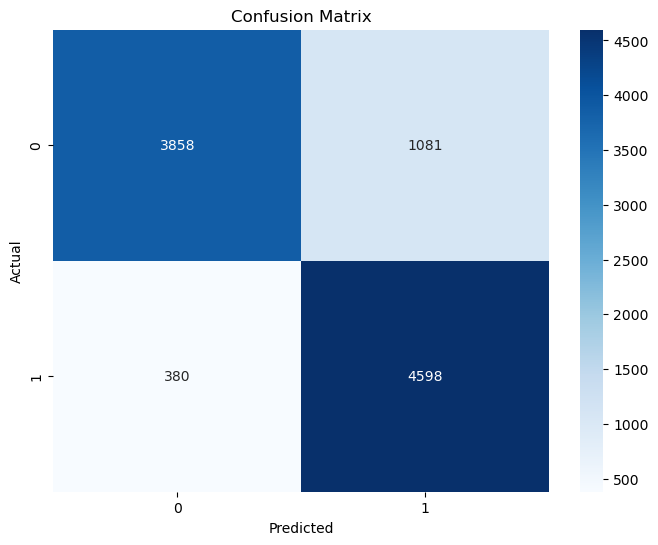

In [94]:
evaluate_model(model, X_test, y_test)

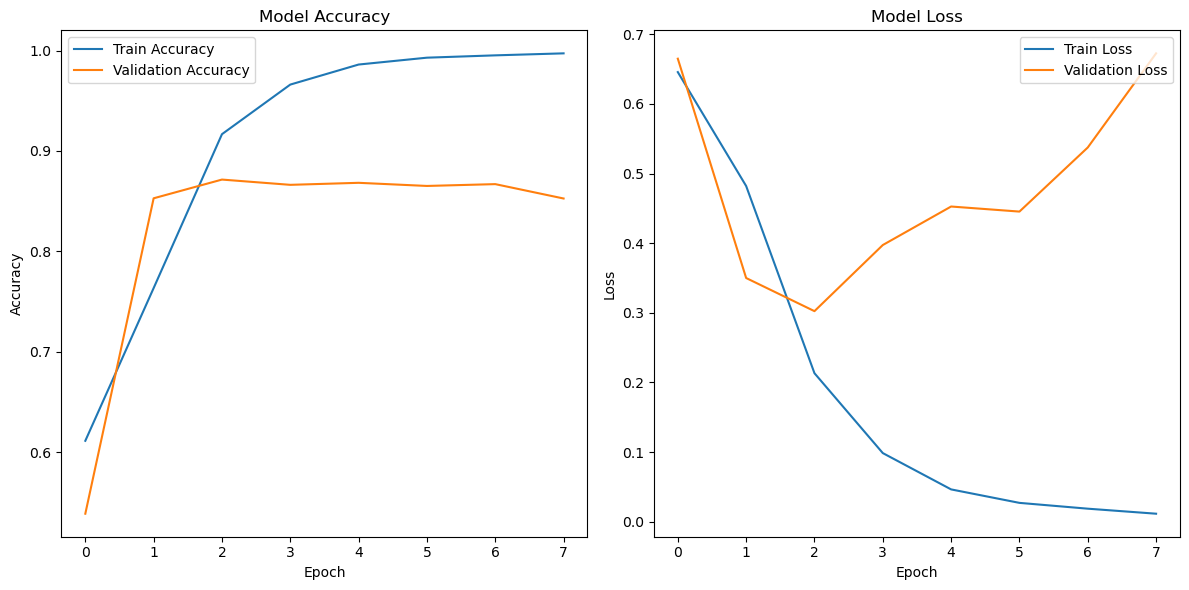

In [95]:
plot_training_history(history)

310/310 [==============================] - 31s 101ms/step


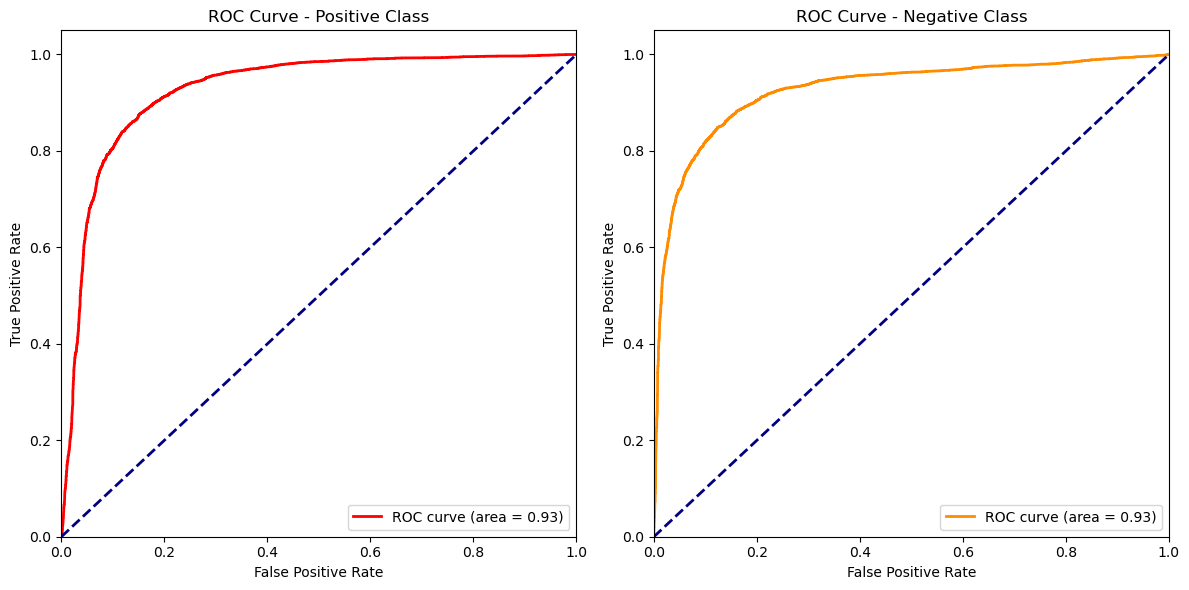

In [96]:
plot_roc_curve(model, X_test, y_test)

# RNN Best Model on cleaned dataset

In [98]:
import os
import requests
import zipfile

def download_glove_embeddings(url, dest_path):
    response = requests.get(url, stream=True)
    with open(dest_path, 'wb') as file:
        for chunk in response.iter_content(chunk_size=128):
            file.write(chunk)

def extract_glove_embeddings(zip_path, extract_to='.'):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
glove_zip_path = "glove.6B.zip"
glove_extract_path = "."

download_glove_embeddings(glove_url, glove_zip_path)
extract_glove_embeddings(glove_zip_path, glove_extract_path)

In [99]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.initializers import Constant

def preprocess_data_for_rnn(df, max_seq_length=128, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size, random_state=42)

    tokenizer = tf.keras.preprocessing.text.Tokenizer()
    tokenizer.fit_on_texts(train_data['reviews_preprocessed'])

    X_train = tokenizer.texts_to_sequences(train_data['reviews_preprocessed'])
    X_test = tokenizer.texts_to_sequences(test_data['reviews_preprocessed'])

    X_train = pad_sequences(X_train, maxlen=max_seq_length, padding='post')
    X_test = pad_sequences(X_test, maxlen=max_seq_length, padding='post')

    y_train = train_data['sentiment']
    y_test = test_data['sentiment']

    return X_train, X_test, y_train, y_test, tokenizer.word_index

In [100]:
def load_pretrained_embedding(word_index, embedding_dim=300):
    embeddings_index = {}
    with open('glove.6B.300d.txt', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs

    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    return embedding_matrix

In [101]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

def build_rnn_model(max_seq_length, vocab_size, embedding_matrix):
    model = tf.keras.Sequential([
        Embedding(input_dim=vocab_size+1, output_dim=300, input_length=max_seq_length,
                  embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix), trainable=False),
        Bidirectional(LSTM(256, return_sequences=True)),
        Dropout(0.5),
        Bidirectional(LSTM(256)),
        Dense(1, activation='sigmoid')
    ])
    return model

def train_rnn_model(X_train, X_test, y_train, y_test, max_seq_length, vocab_size, embedding_matrix, epochs=20):
    model = build_rnn_model(max_seq_length, vocab_size, embedding_matrix)

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_accuracy', patience=5, mode='max')

    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=64,
        validation_data=(X_test, y_test),
        callbacks=[early_stop],
        verbose=1
    )

    # Save the final model after training
    model.save('sanandra_avijan_satviksi_project_final_RNN_model.h5')

    return model, history

In [102]:
X_train, X_test, y_train, y_test, word_index = preprocess_data_for_rnn(df)

max_seq_length = 128
vocab_size = len(word_index)

embedding_matrix = load_pretrained_embedding(word_index, embedding_dim=300)

model, history = train_rnn_model(X_train, X_test, y_train, y_test, max_seq_length, vocab_size, embedding_matrix, epochs=10)

Epoch 1/20
620/620 [==============================] - 370s 592ms/step - loss: 0.4381 - accuracy: 0.7972 - val_loss: 0.3572 - val_accuracy: 0.8392
Epoch 2/20
620/620 [==============================] - 371s 598ms/step - loss: 0.3202 - accuracy: 0.8618 - val_loss: 0.3146 - val_accuracy: 0.8646
Epoch 3/20
620/620 [==============================] - 374s 603ms/step - loss: 0.2805 - accuracy: 0.8820 - val_loss: 0.2870 - val_accuracy: 0.8812
Epoch 4/20
620/620 [==============================] - 397s 640ms/step - loss: 0.2499 - accuracy: 0.8977 - val_loss: 0.3187 - val_accuracy: 0.8582
Epoch 5/20
620/620 [==============================] - 528s 852ms/step - loss: 0.2075 - accuracy: 0.9175 - val_loss: 0.3304 - val_accuracy: 0.8658
Epoch 6/20
620/620 [==============================] - 405s 653ms/step - loss: 0.1770 - accuracy: 0.9324 - val_loss: 0.3001 - val_accuracy: 0.8856
Epoch 7/20
620/620 [==============================] - 378s 610ms/step - loss: 0.1291 - accuracy: 0.9511 - val_loss: 0.3284 -

In [103]:
# Evaluate the model
loss_rnn_glove, accuracy_rnn_glove = model.evaluate(X_test, y_test)
print(f'Loss: {loss_rnn_glove:.4f}, Accuracy: {accuracy_rnn_glove:.4f}')

310/310 [==============================] - 39s 127ms/step - loss: 0.4986 - accuracy: 0.8773
Loss: 0.4986, Accuracy: 0.8773


In [104]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 128, 300)          54626700  
                                                                 
 bidirectional_2 (Bidirecti  (None, 128, 512)          1140736   
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 128, 512)          0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 512)               1574912   
 onal)                                                           
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 57342861 (218.75 MB)
Trainable params: 2

310/310 [==============================] - 40s 128ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88      4939
           1       0.88      0.87      0.88      4978

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



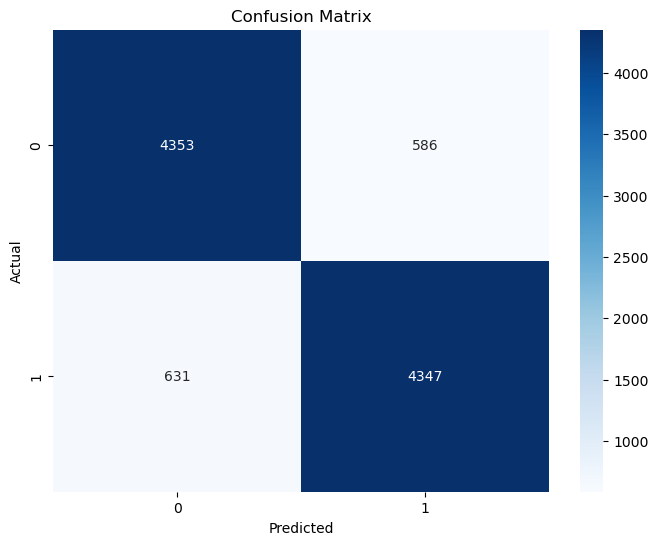

In [105]:
evaluate_model(model, X_test, y_test)

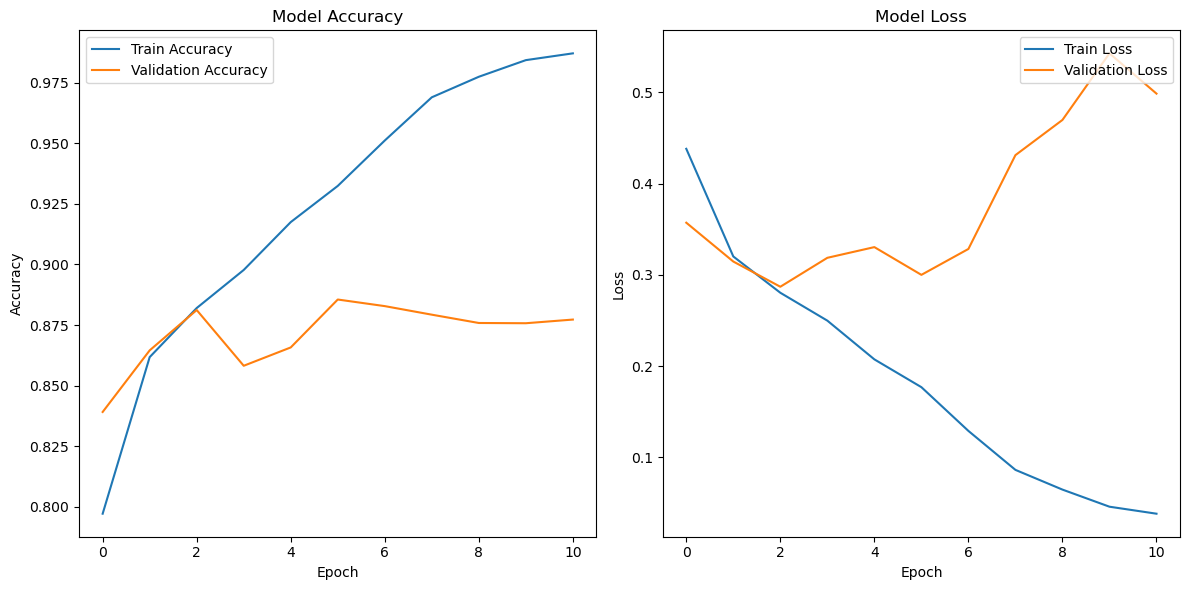

In [106]:
plot_training_history(history)

310/310 [==============================] - 39s 126ms/step


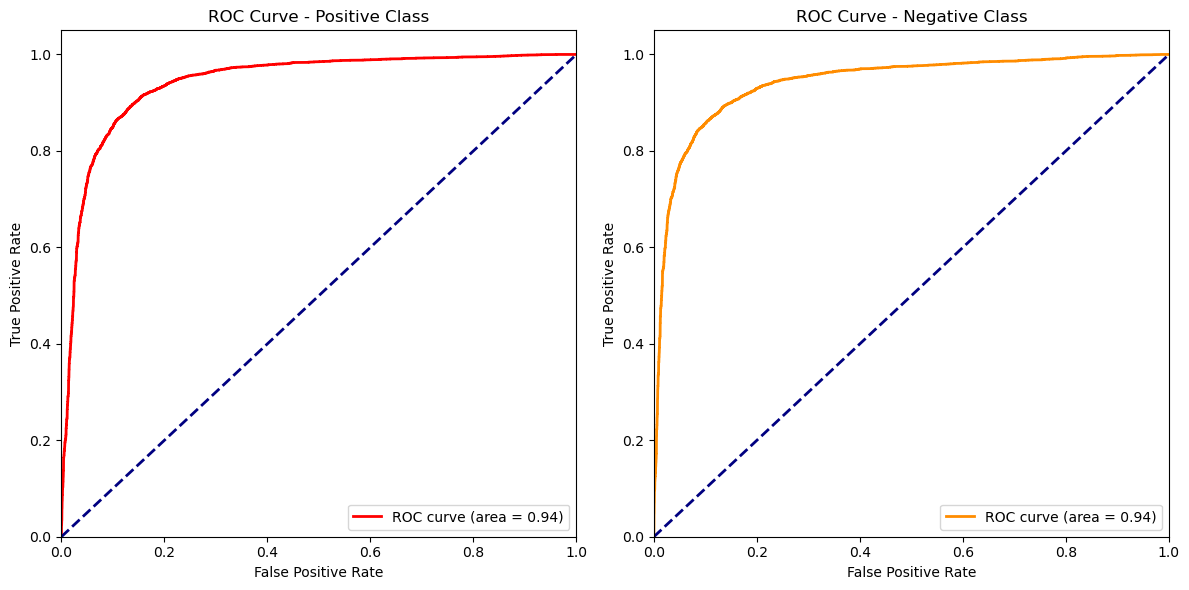

In [107]:
plot_roc_curve(model, X_test, y_test)

**Positive real case movie review** - "The movie was quite enjoyable with stellar performances and captivating visuals. However, there were moments where the pacing seemed a bit off, and some plot points felt slightly forced. Despite these minor issues, the overall experience was very satisfying and left a lasting impression."


In [109]:
predictive_system("The movie was quite enjoyable with stellar performances and captivating visuals. However, there were moments where the pacing seemed a bit off, and some plot points felt slightly forced. Despite these minor issues, the overall experience was very satisfying and left a lasting impression.")

1/1 [==============================] - 0s 402ms/step


'positive'

# Comaprsions and Discussions

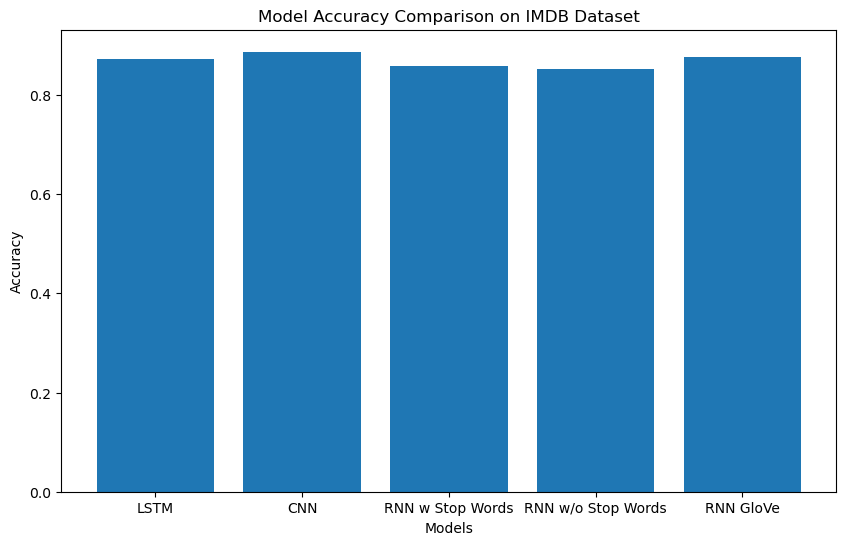

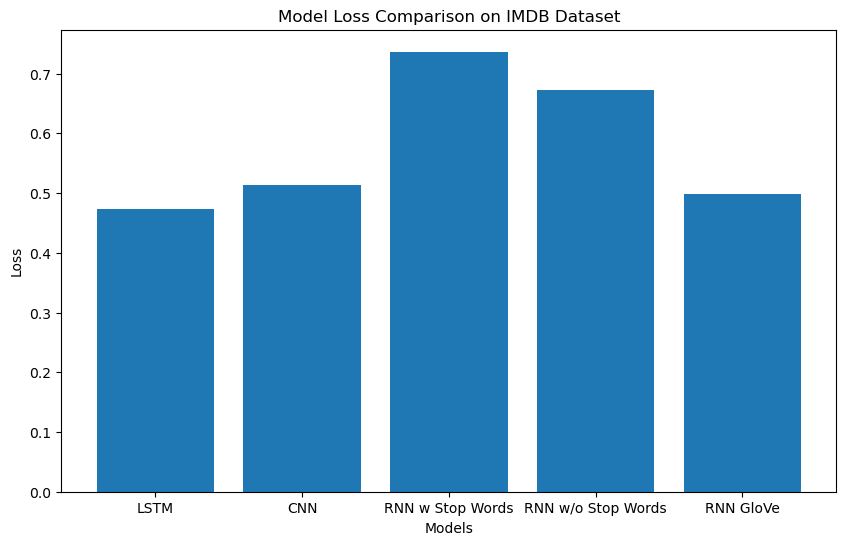

In [115]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Store accuracies and losses in lists
accuracies = [accuracy_lstm, accuracy_cnn, accuracy_rnn_basic, accuracy_rnn_cleaned, accuracy_rnn_glove]
losses = [loss_lstm, loss_cnn, loss_rnn_basic, loss_rnn_cleaned, loss_rnn_glove]

# Define model names
model_names = ['LSTM', 'CNN', 'RNN w Stop Words', 'RNN w/o Stop Words', 'RNN GloVe']

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(range(len(model_names)), accuracies, tick_label=model_names)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison on IMDB Dataset')
plt.show()

# Plot the losses
plt.figure(figsize=(10, 6))
plt.bar(range(len(model_names)), losses, tick_label=model_names)
plt.xlabel('Models')
plt.ylabel('Loss')
plt.title('Model Loss Comparison on IMDB Dataset')
plt.show()